# 1.檢視相關資料集

In [27]:
import numpy as np
import pandas as pd

In [28]:
import os
for dirname, _, filenames in os.walk('./titanic'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

./titanic\gender_submission.csv
./titanic\test.csv
./titanic\train.csv


In [29]:
!dir

 磁碟區 L 中的磁碟是 wlpan@gl.ck.tp.edu.tw - Googl...
 磁碟區序號:  1983-1116

 L:\我的雲端硬碟\資訊教學\kaggle\1_titanic 的目錄

2022/12/19  上午 09:02    <DIR>          .
2022/12/16  上午 11:11    <DIR>          ..
2022/12/16  上午 11:15    <DIR>          titanic
2022/12/19  上午 09:02            34,073 code1.ipynb
2022/12/16  上午 11:25    <DIR>          .ipynb_checkpoints
               1 個檔案          34,073 位元組
               4 個目錄  827,793,514,496 位元組可用


In [30]:
train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')
gender_submission=pd.read_csv('titanic/gender_submission.csv')

In [31]:
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [32]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [33]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [34]:
data = pd.concat([train, test], sort=False)

In [35]:
data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [36]:
#看看訓練資料數、測試資料數，以及合併資料數
print(len(train), len(test), len(data))

891 418 1309


In [37]:
# 看看各欄位資料有多少筆為null
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [38]:
# 將male,female,調整為機器學習可以使用的0與1
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [43]:
# 將Embarked(已登船)欄位的nan資料改為S
data['Embarked'].fillna(('S'), inplace=True)
# 再將S,C,Q,改為機器學習可以使用的0,1,2
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [44]:
# 將票價欄位的na資料改以票價的平均數填入，這樣不會影響整體的平均票價。
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

In [45]:
# 算出年齡的平均值和標準差
age_avg = data['Age'].mean()
age_std = data['Age'].std()
# 將Age欄位的na資料修改為 平均值+-一個標準差的平均值
data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

In [46]:
# 將以下欄位的資料刪除
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

In [47]:
data

Survived  Pclass  Sex   Age      Fare  Embarked
0         0.0       3    0  22.0    7.2500         0
1         1.0       1    1  38.0   71.2833         1
2         1.0       3    1  26.0    7.9250         0
3         1.0       1    1  35.0   53.1000         0
4         0.0       3    0  35.0    8.0500         0
..        ...     ...  ...   ...       ...       ...
413       NaN       3    0  22.0    8.0500         0
414       NaN       1    1  39.0  108.9000         1
415       NaN       3    0  38.5    7.2500         0
416       NaN       3    0  22.0    8.0500         0
417       NaN       3    0  22.0   22.3583         1

[1309 rows x 6 columns]

In [50]:
# 將train和test資料由data資料拆開
train = data[:len(train)]
test = data[len(train):]

In [53]:
# 將train資料的Survived欄位取出成為y_train
y_train = train['Survived']
# 將train資料刪除Survived後成為X_train
X_train = train.drop('Survived', axis=1)
# 將test資料刪除Survived後成為X_test
X_test = test.drop('Survived', axis=1)

In [54]:
X_train.head()

Pclass  Sex   Age     Fare  Embarked
0       3    0  22.0   7.2500         0
1       1    1  38.0  71.2833         1
2       3    1  26.0   7.9250         0
3       1    1  35.0  53.1000         0
4       3    0  35.0   8.0500         0

In [55]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

# 利用pandas_profiling確認概要
使用Pandas Profiling套件，快速確認資料分析概要

In [60]:
!pip install pandas_profiling

     -------------------------------------- 325.0/325.0 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
     ------------------------------------- 663.5/663.5 kB 40.8 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 43.3 MB/s eta 0:00:00
     ------------------------------------- 296.5/296.5 kB 17.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=e4b8cecf0b45712f6a11683f48bd9d9a878df8a45fcd649c4ca41843af880c4b
  Stored in directory: c:\users\powerpan\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [61]:
import pandas_profiling

# 各變數說明
1.Survived:死(0)或活(1)的人數。
2.age:乘客的年紀。
3.SibSp: siblings / spouses aboard the Titanic共乘兄弟姐妹與配偶的人數
4.Parch: Number of Parents/Children Aboard 共乘父母或子女的人數
5.Fare:船資
6.Pclass:艙等，有1,2,3等艙
7.Sex:性別
8.Ticket:船票編號
9.Cabin:客房編號
10.Embarked:搭船的港口
11.Name:姓名

In [66]:
train_p=pd.read_csv('titanic/train.csv')
train_p.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
!pip install matplotlib

# 確認各特徵值與目標變數的關聯性
找出能提升預測正確度的假設。

## Age與目標變數的關聯性
年輕人與年長者生存率較高，二十幾歲到三十幾歲的人生存率較低。

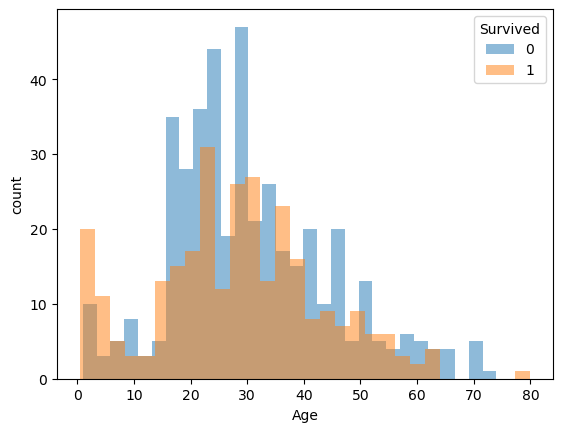

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt
train_p=pd.read_csv('titanic/train.csv')
plt.hist(train_p.loc[train['Survived']==0,'Age'].dropna(),bins=30,alpha=0.5,label='0')
plt.hist(train_p.loc[train['Survived']==1,'Age'].dropna(),bins=30,alpha=0.5,label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived')
plt.show()

## SibSp與目標變數的關聯性
沒有手足與3個以上手足的生存率較低。 

In [84]:
!pip install seaborn

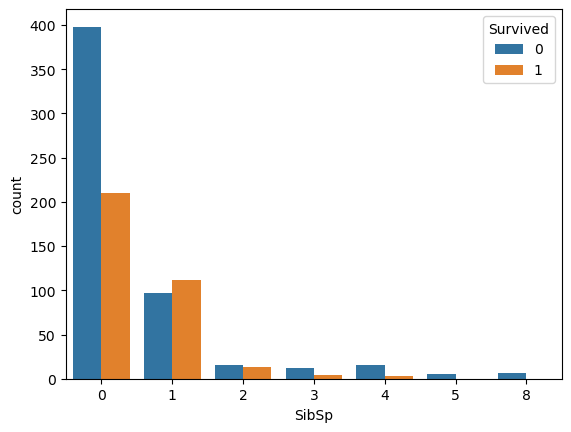

In [93]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
train_p=pd.read_csv('titanic/train.csv')
sns.countplot(x='SibSp',hue='Survived',data=train_p) #資料來源是train_p,欲處理欄位資料為SibSp,再用Survived欄位進行分類。
plt.legend(loc='upper right',title='Survived')
plt.show()

# Parch與目標變數的關聯性
0與4以上生存率較低。

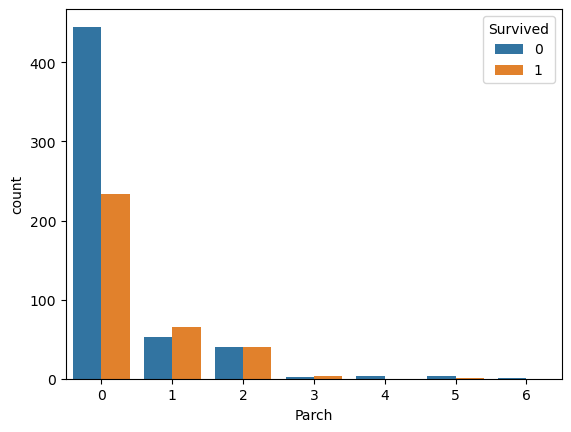

In [94]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
train_p=pd.read_csv('titanic/train.csv')
sns.countplot(x='Parch',hue='Survived',data=train_p) #資料來源是train_p,欲處理欄位資料為SibSp,再用Survived欄位進行分類。
plt.legend(loc='upper right',title='Survived')
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)